In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### 데이터셋의 특징

In [4]:
df = pd.read_csv('winequality-red.csv')
df.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 종속변수 (Quality)의 각 범주별 데이터 분포

In [25]:
# 'diagnosis' 열의 각 범주별 데이터 수 확인
quality_counts = df['quality'].value_counts()

# 결과 출력
print(quality_counts)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


'Quality' 변수에서 각 범주별 데이터의 수를 확인하였다. 범주는 3에서 8까지 존재하며 quality가 5와 6일 때 가장 많은 데이터 수가 존재하는 것으로 보인다. 하나의 범주에 많은 데이터가 치우쳐서 분포하면 KNN 모델이 잘 작동되지 않을 수 있다. 클래스 간의 데이터 수가 크게 차이 나면 거리 기반 알고리즘에서는 빈도가 많은 클래스에 더 큰 영향을 받을 수 있습니다. 불균형한 클래스 분포에서는 다양한 클래스 간의 데이터 수 차이를 고려하지 않으면 모델이 불균형한 클래스에 편향될 가능성이 높습니다. 이러한 경우에 샘플링기법이나 가중치를 부여해야하는 경우를 고려해야할 것입니다. (또는 불균형한 클래스에 민감하지 않은 다른 모델을 선택하는 것이 중요하지만, 본 과제는 KNN의 하이퍼파라미터를 수행하는 것이므로 이는 고려하지 않는다.)

### 각 변수들의 분포 (히스토그램-1)

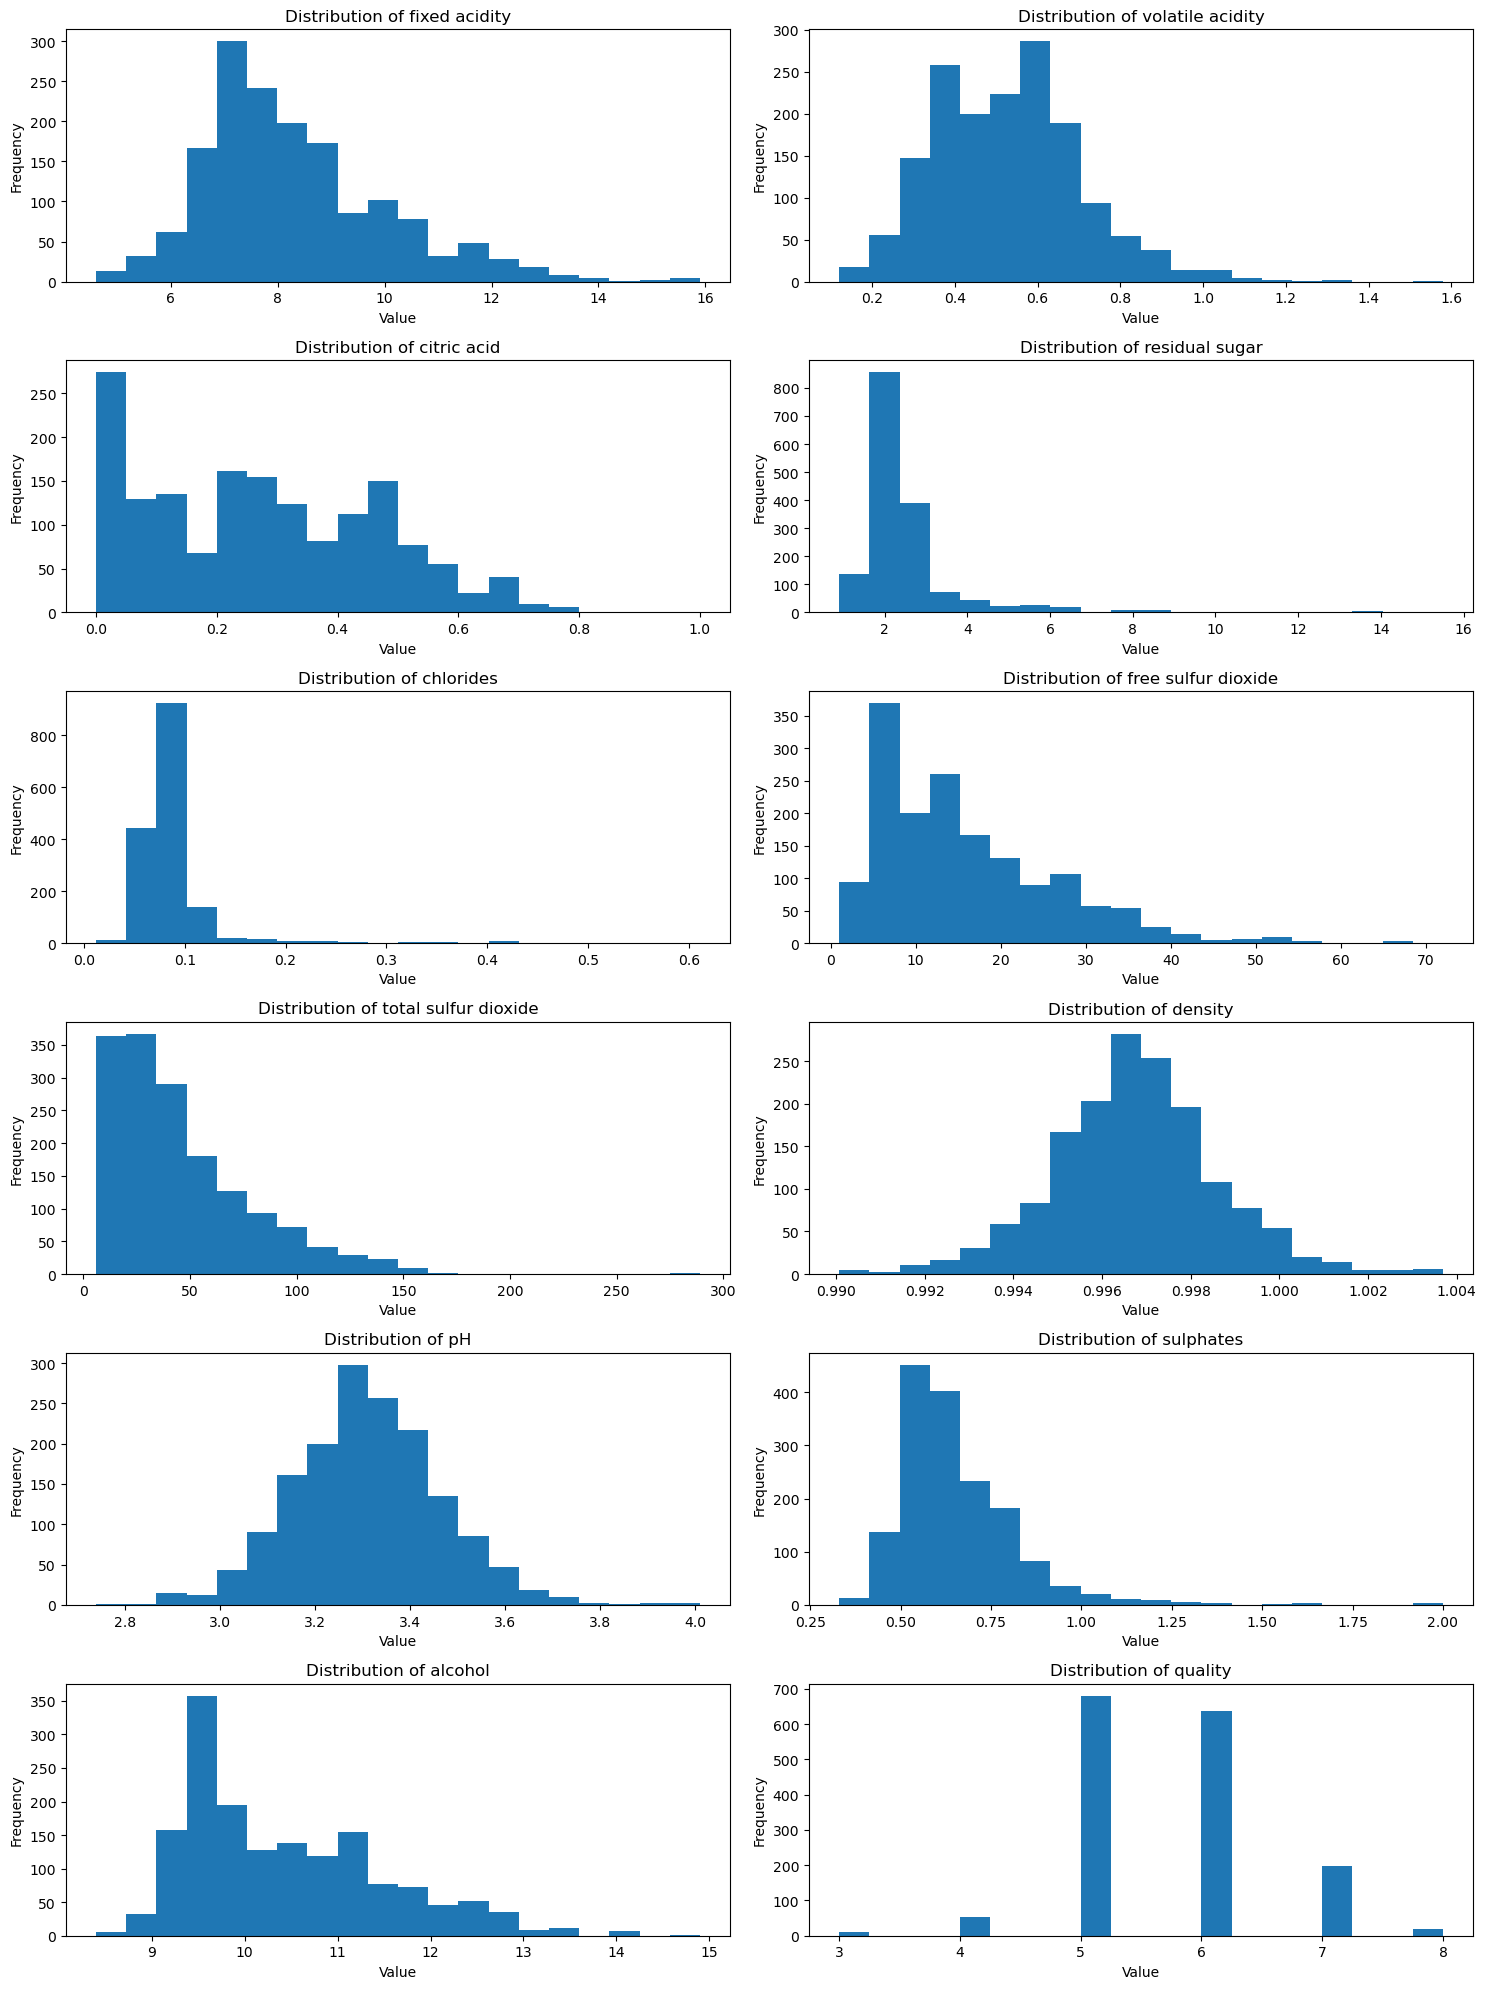

In [12]:
import matplotlib.pyplot as plt
import math

# 그리드 생성
num_cols = len(df.columns)
num_rows = math.ceil(num_cols / 2)  # 2열로 나누어 그리기

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 20))

# 각 열의 독립변수들의 분포를 서브플롯에 그리기
for i, column in enumerate(df.columns):
    row_index = i // 2
    col_index = i % 2
    axes[row_index, col_index].hist(df[column], bins=20)  # 히스토그램을 20개의 구간으로 나눔
    axes[row_index, col_index].set_title(f'Distribution of {column}')
    axes[row_index, col_index].set_xlabel('Value')
    axes[row_index, col_index].set_ylabel('Frequency')

# 남은 subplot 숨기기
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes.flatten()[i])

# 레이아웃 조정
plt.tight_layout()
plt.show()

### 각 변수들의 분포 (히스토그램-2)
##### 히스토그램을 따라 곡선이 추가됨

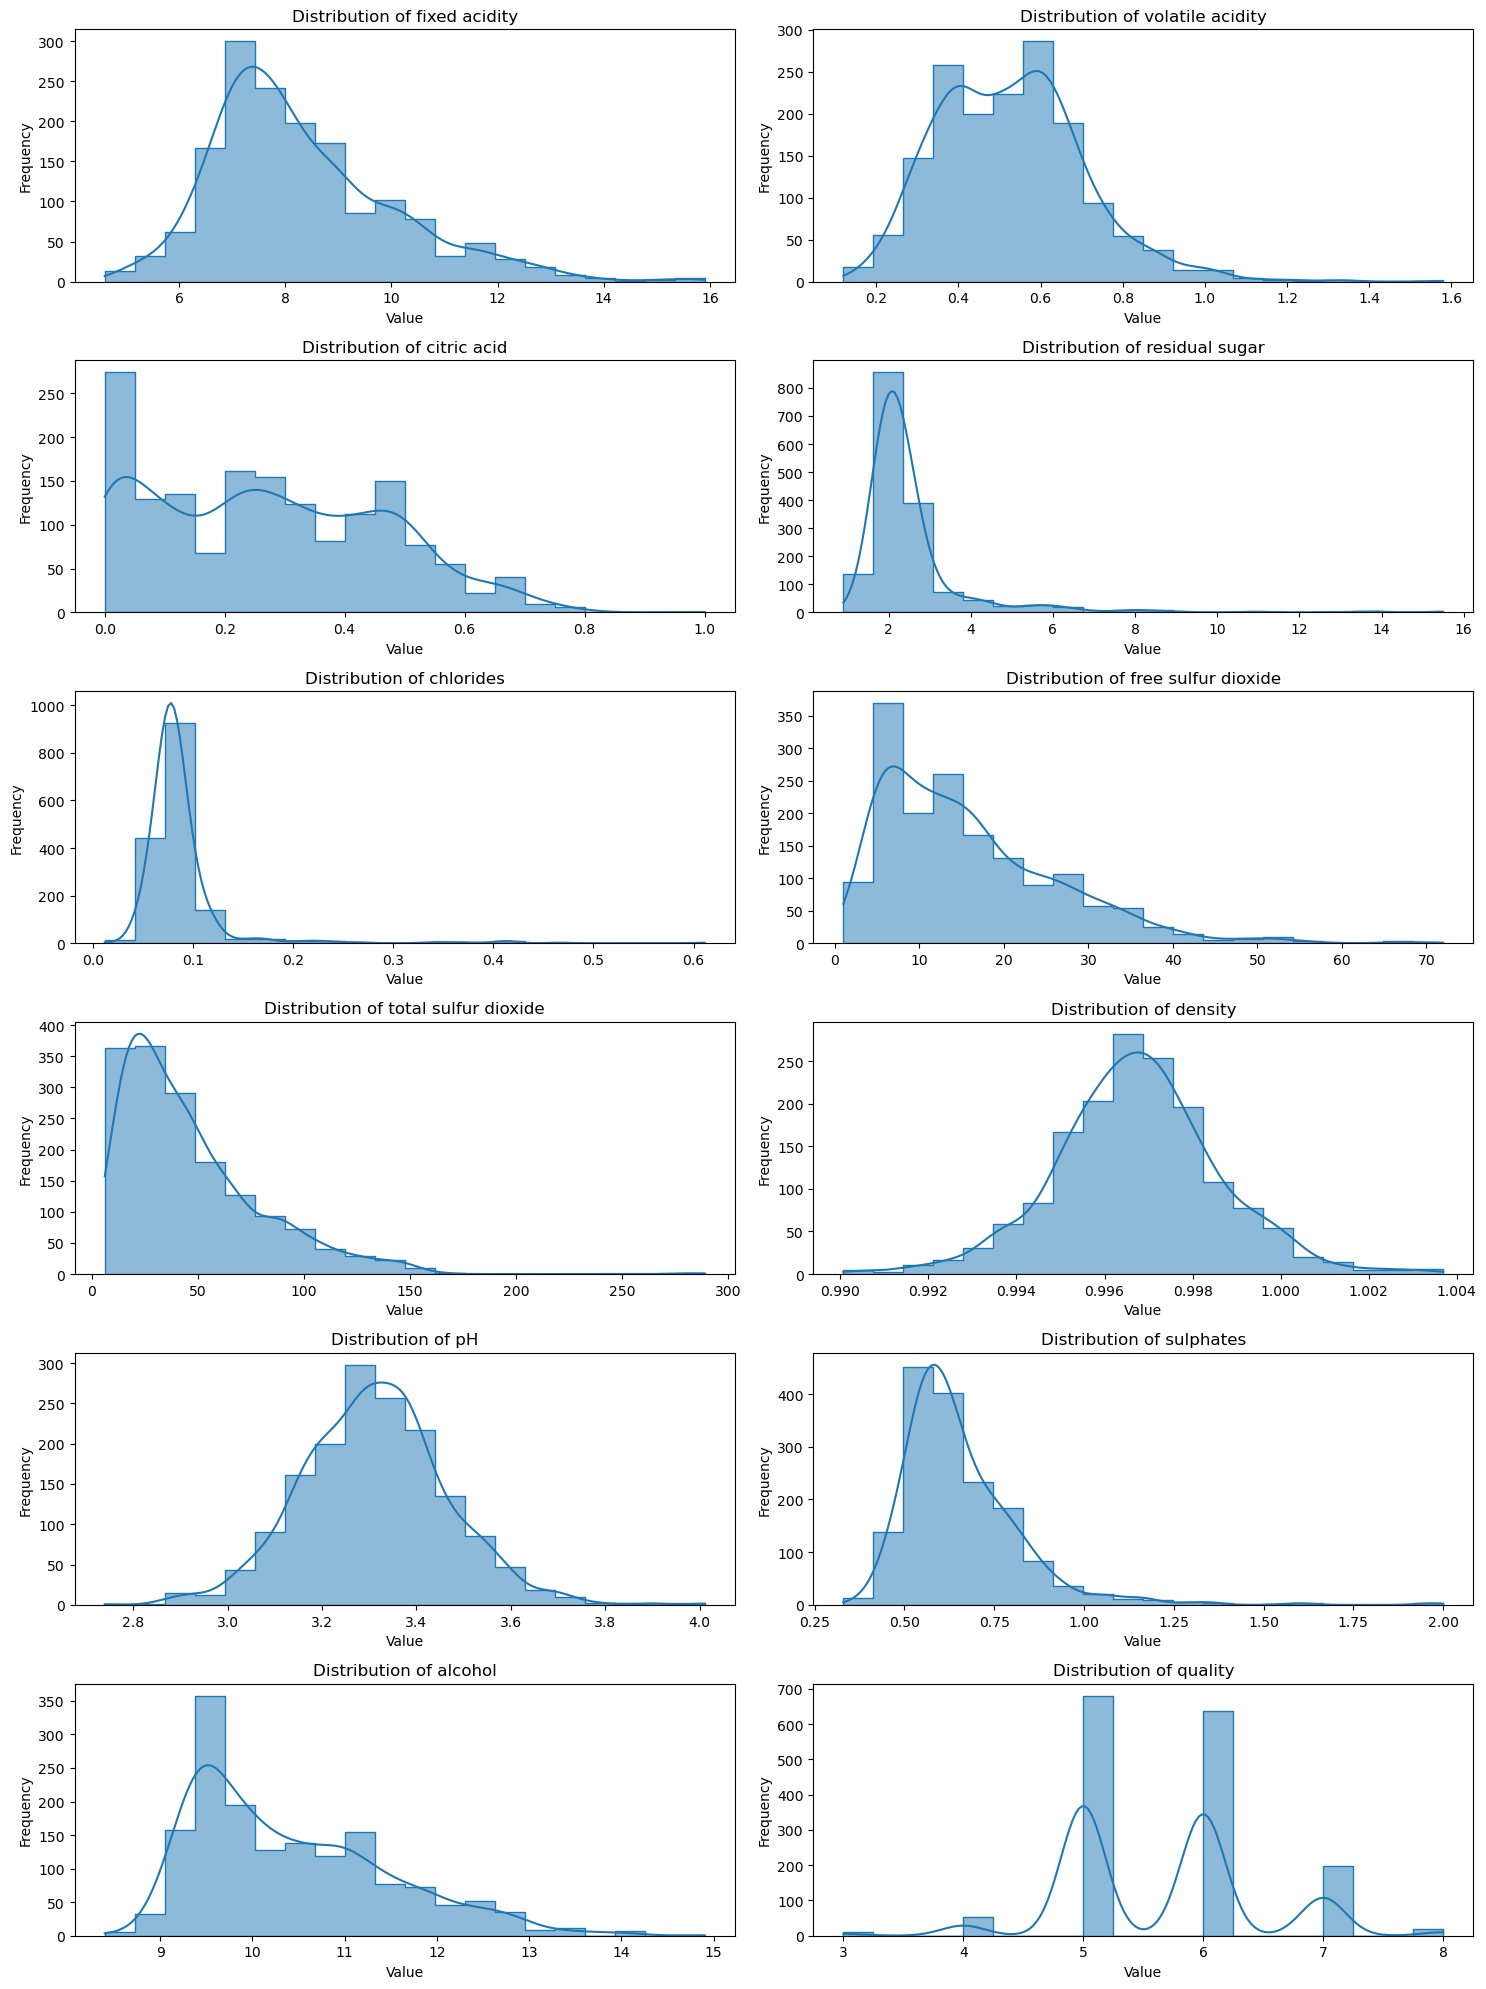

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 그리드 생성
num_cols = len(df.columns)
num_rows = math.ceil(num_cols / 2)  # 2열로 나누어 그리기

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 20))

# 각 열의 독립변수들의 분포를 서브플롯에 그리기
for i, column in enumerate(df.columns):
    row_index = i // 2
    col_index = i % 2
    sns.histplot(df[column], bins=20, kde=True, element="step", ax=axes[row_index, col_index])  # 곡선만 표시
    axes[row_index, col_index].set_title(f'Distribution of {column}')
    axes[row_index, col_index].set_xlabel('Value')
    axes[row_index, col_index].set_ylabel('Frequency')

# 남은 subplot 숨기기
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes.flatten()[i])

# 레이아웃 조정
plt.tight_layout()
plt.show()

### 각 변수들의 분포 (히스토그램-3)

본 히스토그램은 새로 추가한 것으로 각 변수에 있는 데이터의 분포를 좀 더 분석하기 쉽도록, 히스토그램에 평균, 중앙값, 최빈값을 점선으로 표시할 수 있도록 하였다. 그리고 히스토그램의 우상단에는 표준편차, 첨도, 왜도의 값을 표시하였다.

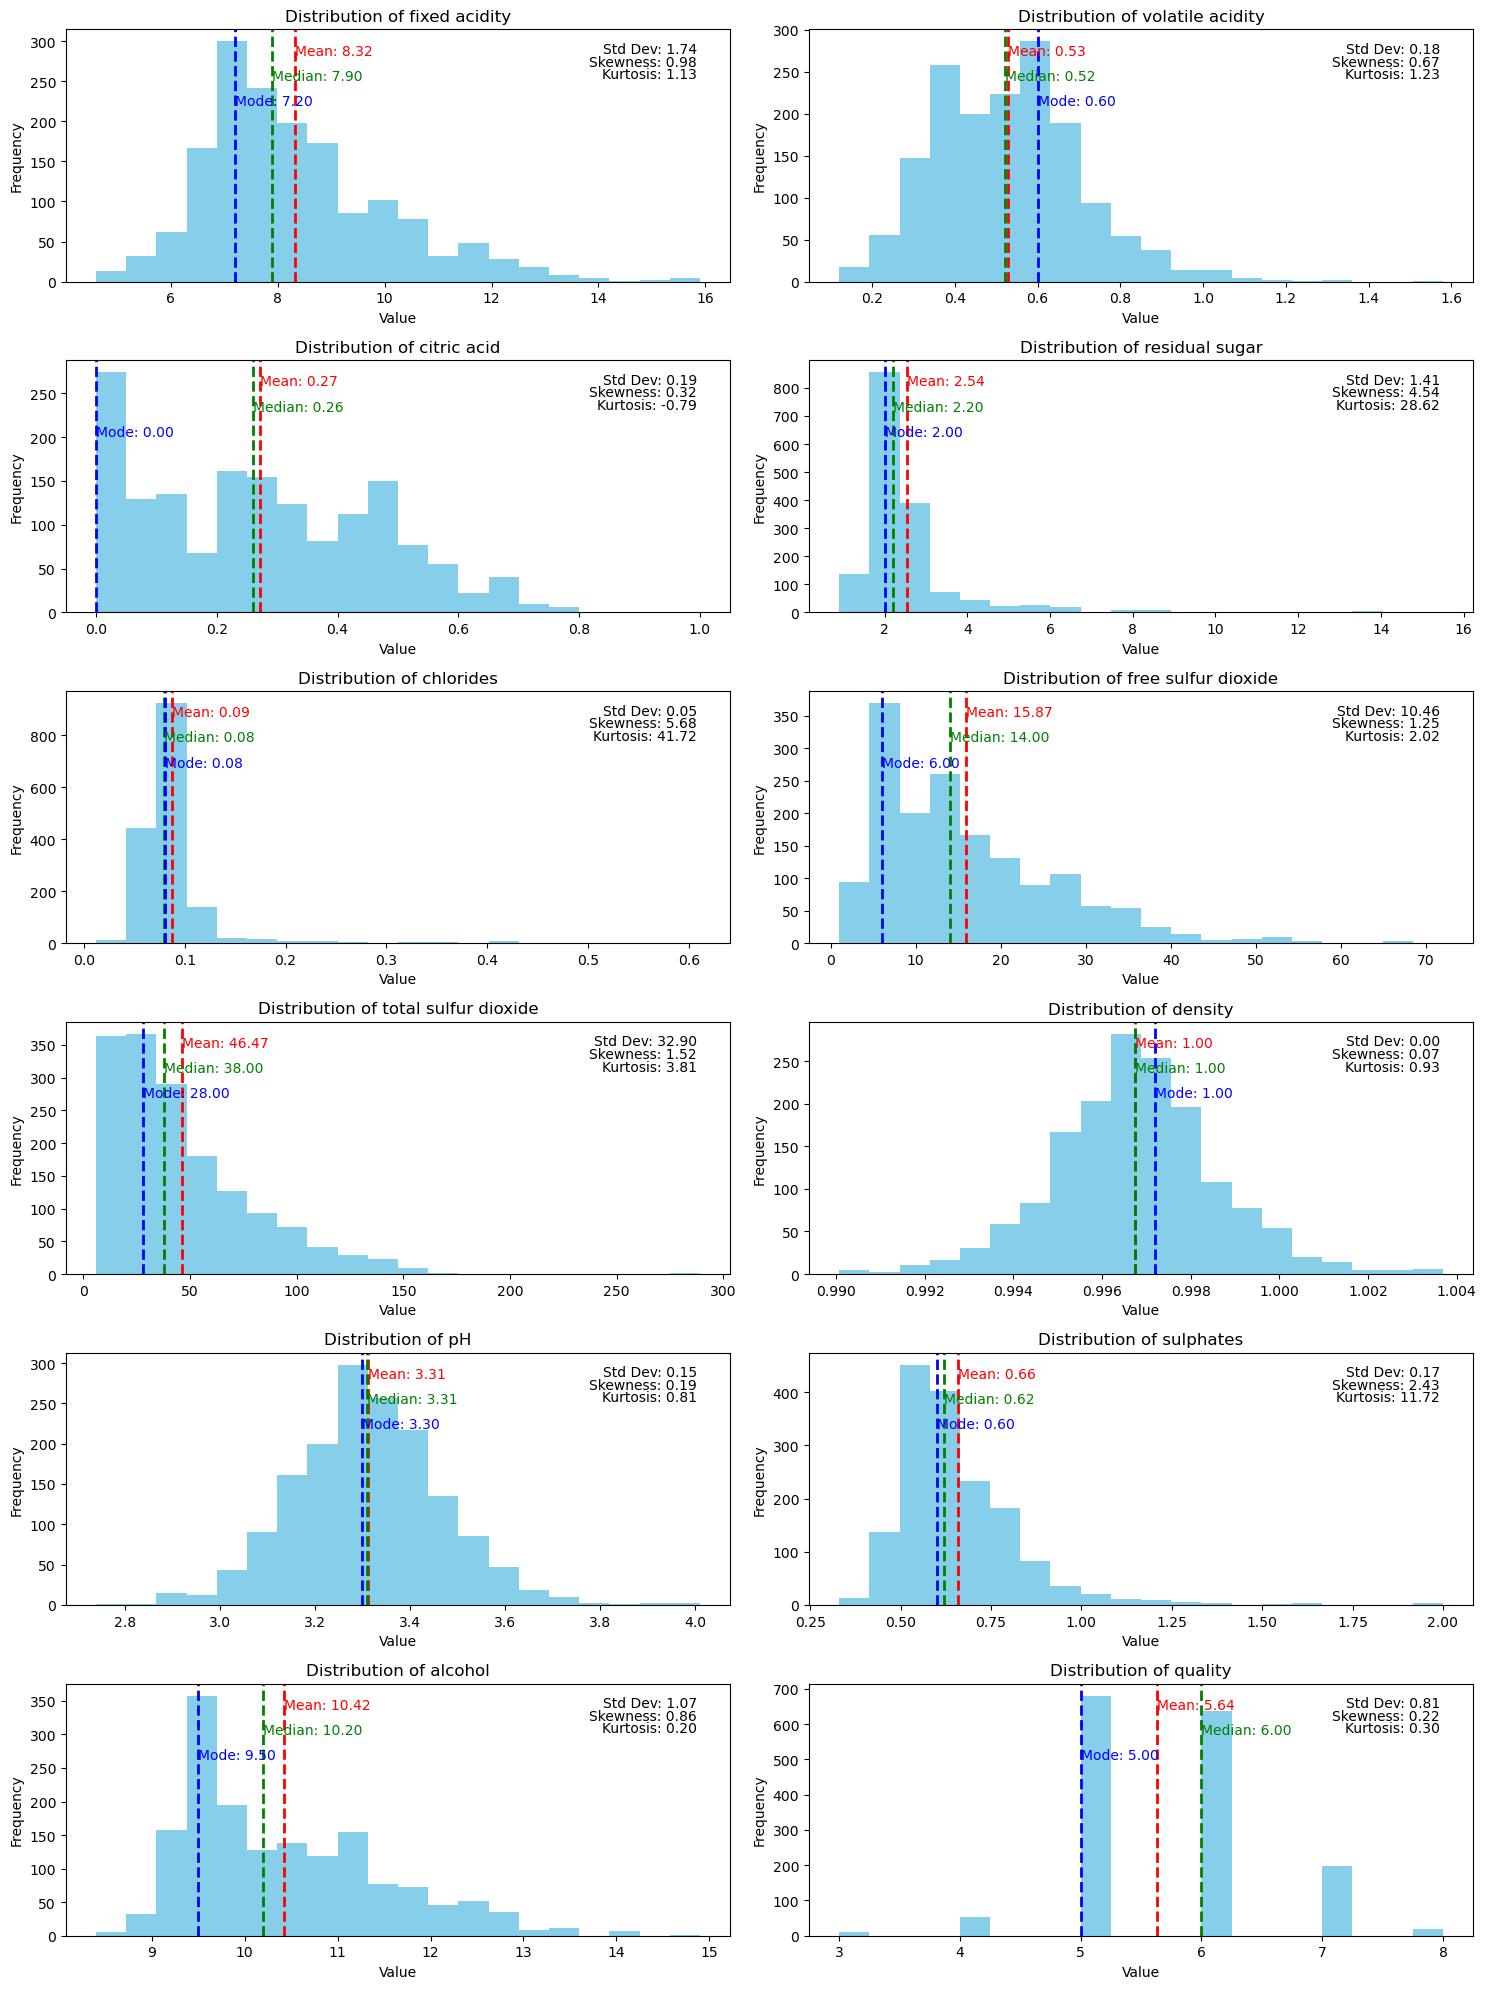

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 그리드 생성
num_cols = len(df.columns)
num_rows = math.ceil(num_cols / 2)  # 2열로 나누어 그리기

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 20))

# 각 열의 독립변수들의 분포를 서브플롯에 그리기
for i, column in enumerate(df.columns):
    row_index = i // 2
    col_index = i % 2
    axes[row_index, col_index].hist(df[column], bins=20, color='skyblue')  # 히스토그램 색깔 변경
    axes[row_index, col_index].set_title(f'Distribution of {column}')
    axes[row_index, col_index].set_xlabel('Value')
    axes[row_index, col_index].set_ylabel('Frequency')

    # 통계치 계산
    mean_val = df[column].mean()
    median_val = df[column].median()
    mode_val = df[column].mode()[0]  # 최빈값은 mode()의 결과 중 첫 번째 값 사용
    std_dev_val = df[column].std()
    skewness_val = df[column].skew()
    kurtosis_val = df[column].kurtosis()

    # 통계치를 히스토그램 위에 선으로 표시
    axes[row_index, col_index].axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label='Mean')
    axes[row_index, col_index].axvline(median_val, color='green', linestyle='dashed', linewidth=2, label='Median')
    axes[row_index, col_index].axvline(mode_val, color='blue', linestyle='dashed', linewidth=2, label='Mode')  # 색깔 변경
    
    # 통계치 이름 표시
    axes[row_index, col_index].text(mean_val, axes[row_index, col_index].get_ylim()[1]*0.9, f'Mean: {mean_val:.2f}', color='red')
    axes[row_index, col_index].text(median_val, axes[row_index, col_index].get_ylim()[1]*0.8, f'Median: {median_val:.2f}', color='green')
    axes[row_index, col_index].text(mode_val, axes[row_index, col_index].get_ylim()[1]*0.7, f'Mode: {mode_val:.2f}', color='blue')  # 색깔 변경

    # 표준편차, 첨도, 왜도를 히스토그램 오른쪽 상단에 텍스트로 표시
    axes[row_index, col_index].text(0.95, 0.95, f'Std Dev: {std_dev_val:.2f}', transform=axes[row_index, col_index].transAxes, ha='right', va='top')
    axes[row_index, col_index].text(0.95, 0.90, f'Skewness: {skewness_val:.2f}', transform=axes[row_index, col_index].transAxes, ha='right', va='top')
    axes[row_index, col_index].text(0.95, 0.85, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[row_index, col_index].transAxes, ha='right', va='top')

# 남은 subplot 숨기기
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes.flatten()[i])

# 레이아웃 조정
plt.tight_layout()
plt.show()


##### (1) Fixed Acidity:
표준편차가 1.74로 중간 정도로 흩어져 있음.
첨도가 1.13로 뾰족한 꼬리를 가진 비대칭 분포.
왜도가 0.98로 오른쪽꼬리분포.

##### (2) Volatile Acidity:
표준편차가 0.18로 낮은 편.
첨도가 1.23로 뾰족한 꼬리를 가진 비대칭 분포.
왜도가 0.67로 오른쪽꼬리분포.

##### (3) Citric Acid:
표준편차가 0.19로 낮은 편.
첨도가 -0.79로 둥근 꼬리를 가진 비대칭 분포.
왜도가 0.32로 오른쪽꼬리분포.

##### (4) Residual Sugar:
표준편차가 1.41로 중간 정도로 흩어져 있음.
첨도가 28.62로 매우 뾰족한 꼬리를 가진 매우 비대칭 분포.
왜도가 4.54로 오른쪽꼬리분포.

##### (5) Chlorides:
표준편차가 0.05로 낮은 편.
첨도가 41.72로 매우 뾰족한 꼬리를 가진 매우 비대칭 분포.
왜도가 5.68로 오른쪽꼬리분표.

##### (6) Free Sulfur Dioxide:
표준편차가 10.46으로 중간 정도로 흩어져 있음.
첨도가 2.02로 뾰족한 꼬리를 가진 비대칭 분포.
왜도가 1.25로 오른쪽꼬리분포.

##### (7) Total Sulfur Dioxide:
표준편차가 32.90으로 큰 편.
첨도가 3.81로 뾰족한 꼬리를 가진 비대칭 분포.
왜도가 1.52로 오른쪽꼬리분포.

##### (8) Density:
표준편차가 0.00로 매우 낮은 편 (거의 변하지 않음).
첨도가 0.93로 둥근 꼬리를 가진 비대칭 분포.
왜도가 0.07로 오른쪽꼬리분포.

##### (9) pH:
표준편차가 0.15로 낮은 편.
첨도가 0.81로 둥근 꼬리를 가진 비대칭 분포.
왜도가 0.19로 오른쪽꼬리분포.

##### (10) Sulphates:
표준편차가 0.17로 낮은 편.
첨도가 2.43로 뾰족한 꼬리를 가진 비대칭 분포.
왜도가 11.72로 오른쪽꼬리분포.

##### (11) Alcohol:
표준편차가 1.07로 중간 정도로 흩어져 있음.
첨도가 0.20로 둥근 꼬리를 가진 비대칭 분포.
왜도가 0.86로 오른쪽꼬리분포.

##### (12) Quality:
표준편차가 0.81로 중간 정도로 흩어져 있음.
첨도가 0.30로 둥근 꼬리를 가진 비대칭 분포.
왜도가 0.22로 오른쪽꼬리분포.

위의 히스토그램에 나타난 값들을 요약하자면 아래와 같은 표로 나타낼 수 있다

(각 변수들의 평균값/중앙값/최빈값/표준편차/첨도/왜도)

In [20]:
import pandas as pd

# 변수별 통계치를 저장할 데이터프레임 생성
summary_df = pd.DataFrame(index=df.columns, columns=['Mean', 'Median', 'Mode', 'Std Dev', 'Skewness', 'Kurtosis'])

# 각 열의 독립변수들의 분포를 서브플롯에 그리기
for column in df.columns:
    # 통계치 계산
    mean_val = df[column].mean()
    median_val = df[column].median()
    mode_val = df[column].mode()[0]  # 최빈값은 mode()의 결과 중 첫 번째 값 사용
    std_dev_val = df[column].std()
    skewness_val = df[column].skew()
    kurtosis_val = df[column].kurtosis()

    # 변수별 통계치 저장
    summary_df.loc[column] = [mean_val, median_val, mode_val, std_dev_val, skewness_val, kurtosis_val]

# 변수별 통계치 출력
print("Variable-wise Summary Statistics:")
summary_df

Variable-wise Summary Statistics:


,Mean,Median,Mode,Std Dev,Skewness,Kurtosis
fixed acidity,8.319637,7.9,7.2,1.741096,0.982751,1.132143
volatile acidity,0.527821,0.52,0.6,0.17906,0.671593,1.225542
citric acid,0.270976,0.26,0.0,0.194801,0.318337,-0.788998
residual sugar,2.538806,2.2,2.0,1.409928,4.540655,28.617595
chlorides,0.087467,0.079,0.08,0.047065,5.680347,41.715787
free sulfur dioxide,15.874922,14.0,6.0,10.460157,1.250567,2.023562
total sulfur dioxide,46.467792,38.0,28.0,32.895324,1.515531,3.809824
density,0.996747,0.99675,0.9972,0.001887,0.071288,0.934079
pH,3.311113,3.31,3.3,0.154386,0.193683,0.806943
sulphates,0.658149,0.62,0.6,0.169507,2.428672,11.720251


### 각 데이터 변수들의 BoxPlot
##### 이상치들이 많이 존재하고 있음을 시각적으로 살펴볼 수 있다.

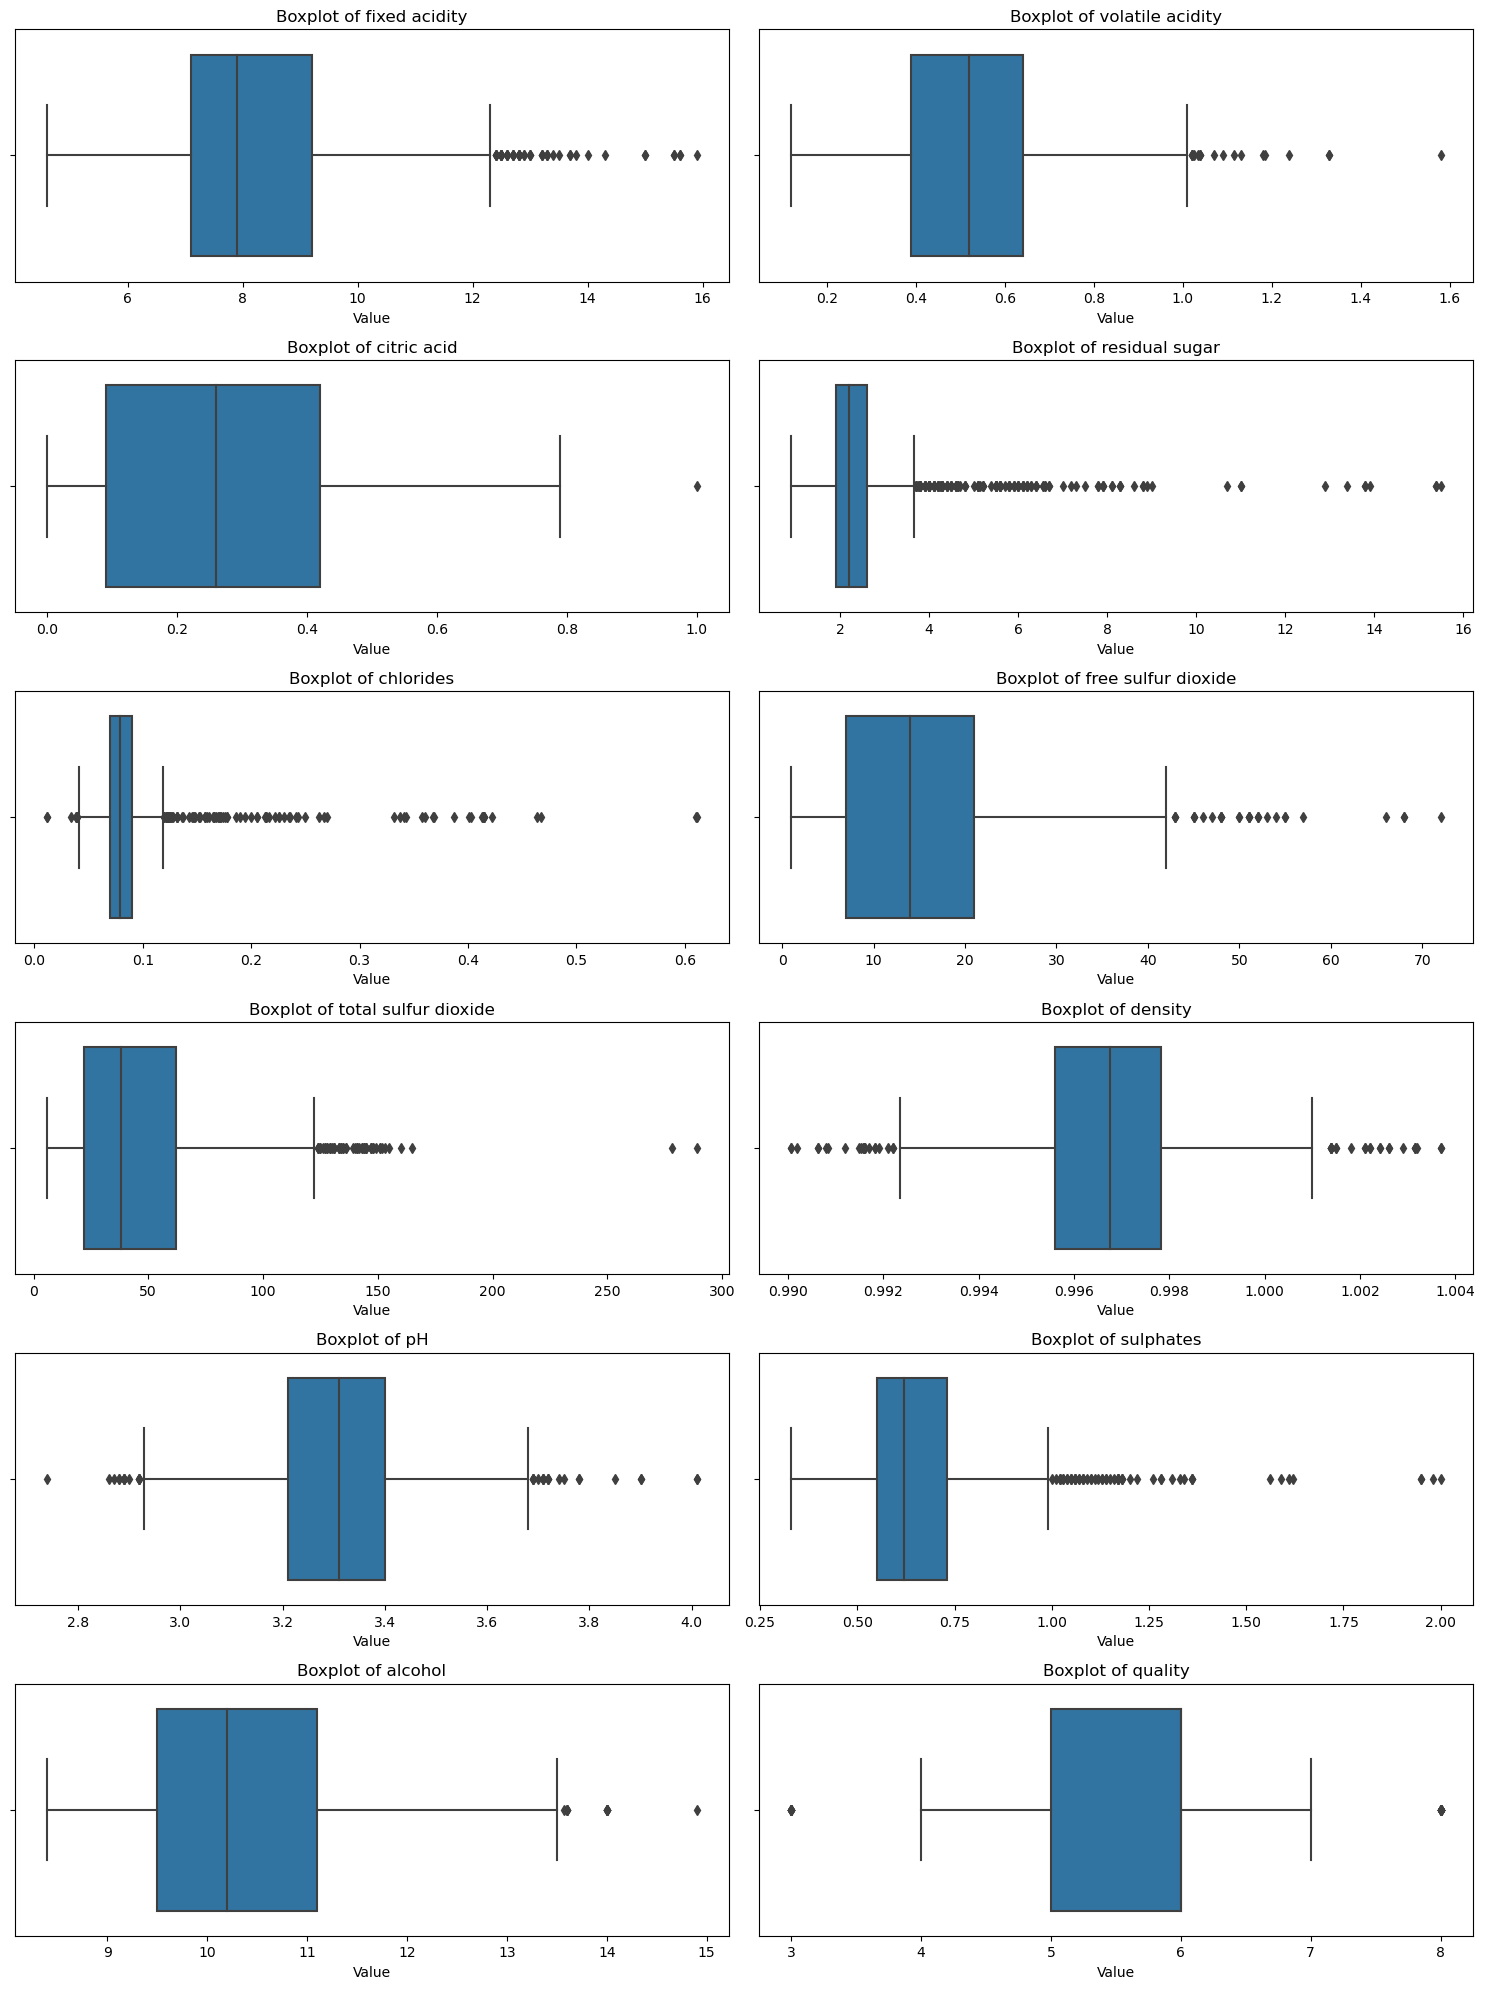

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# 그리드 생성
num_cols = len(df.columns)
num_rows = math.ceil(num_cols / 2)  # 2열로 나누어 그리기

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 20))

# 각 열의 boxplot을 서브플롯에 그리기
for i, column in enumerate(df.columns):
    row_index = i // 2
    col_index = i % 2
    sns.boxplot(x=df[column], ax=axes[row_index, col_index])  # boxplot 그리기
    axes[row_index, col_index].set_title(f'Boxplot of {column}')
    axes[row_index, col_index].set_xlabel('Value')

# 남은 subplot 숨기기
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes.flatten()[i])

# 레이아웃 조정
plt.tight_layout()
plt.show()

### 이상치(Outlier) 찾기
##### 각 변수별 이상치의 개수와 이상치의 범위

이상치를 그대로 둘 것인지, 이상치를 삭제하거나 변환할지 추가적인 의논이 필요한 부분이다.
이상치를 그대로 두었을 때의 데이터간의 상관성과 이상치를 처리했을 때의 상관성을 비교해서 더 적절한 경우를 채택하도록 하자. 

In [22]:
import pandas as pd

# 이상치 확인 함수
def detect_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# 이상치 개수와 범위 출력을 위한 데이터프레임 생성
outliers_df = pd.DataFrame(index=df.columns, columns=['Outlier Count', 'Outlier Range'])

# 각 변수에 대해 이상치 개수와 범위 계산
for column in df.columns:
    outliers = detect_outliers(df[column])
    outlier_count = outliers.sum()
    outlier_range = f"{df[column][outliers].min()} - {df[column][outliers].max()}"
    
    # 결과 저장
    outliers_df.loc[column] = [outlier_count, outlier_range]

# 결과 출력
print("Outlier Information:")
outliers_df

Outlier Information:


,Outlier Count,Outlier Range
fixed acidity,49,12.4 - 15.9
volatile acidity,19,1.02 - 1.58
citric acid,1,1.0 - 1.0
residual sugar,155,3.7 - 15.5
chlorides,112,0.012 - 0.611
free sulfur dioxide,30,43.0 - 72.0
total sulfur dioxide,55,124.0 - 289.0
density,45,0.99007 - 1.00369
pH,35,2.74 - 4.01
sulphates,59,1.0 - 2.0


### 독립변수() - 종속변수(quality)의 산점도

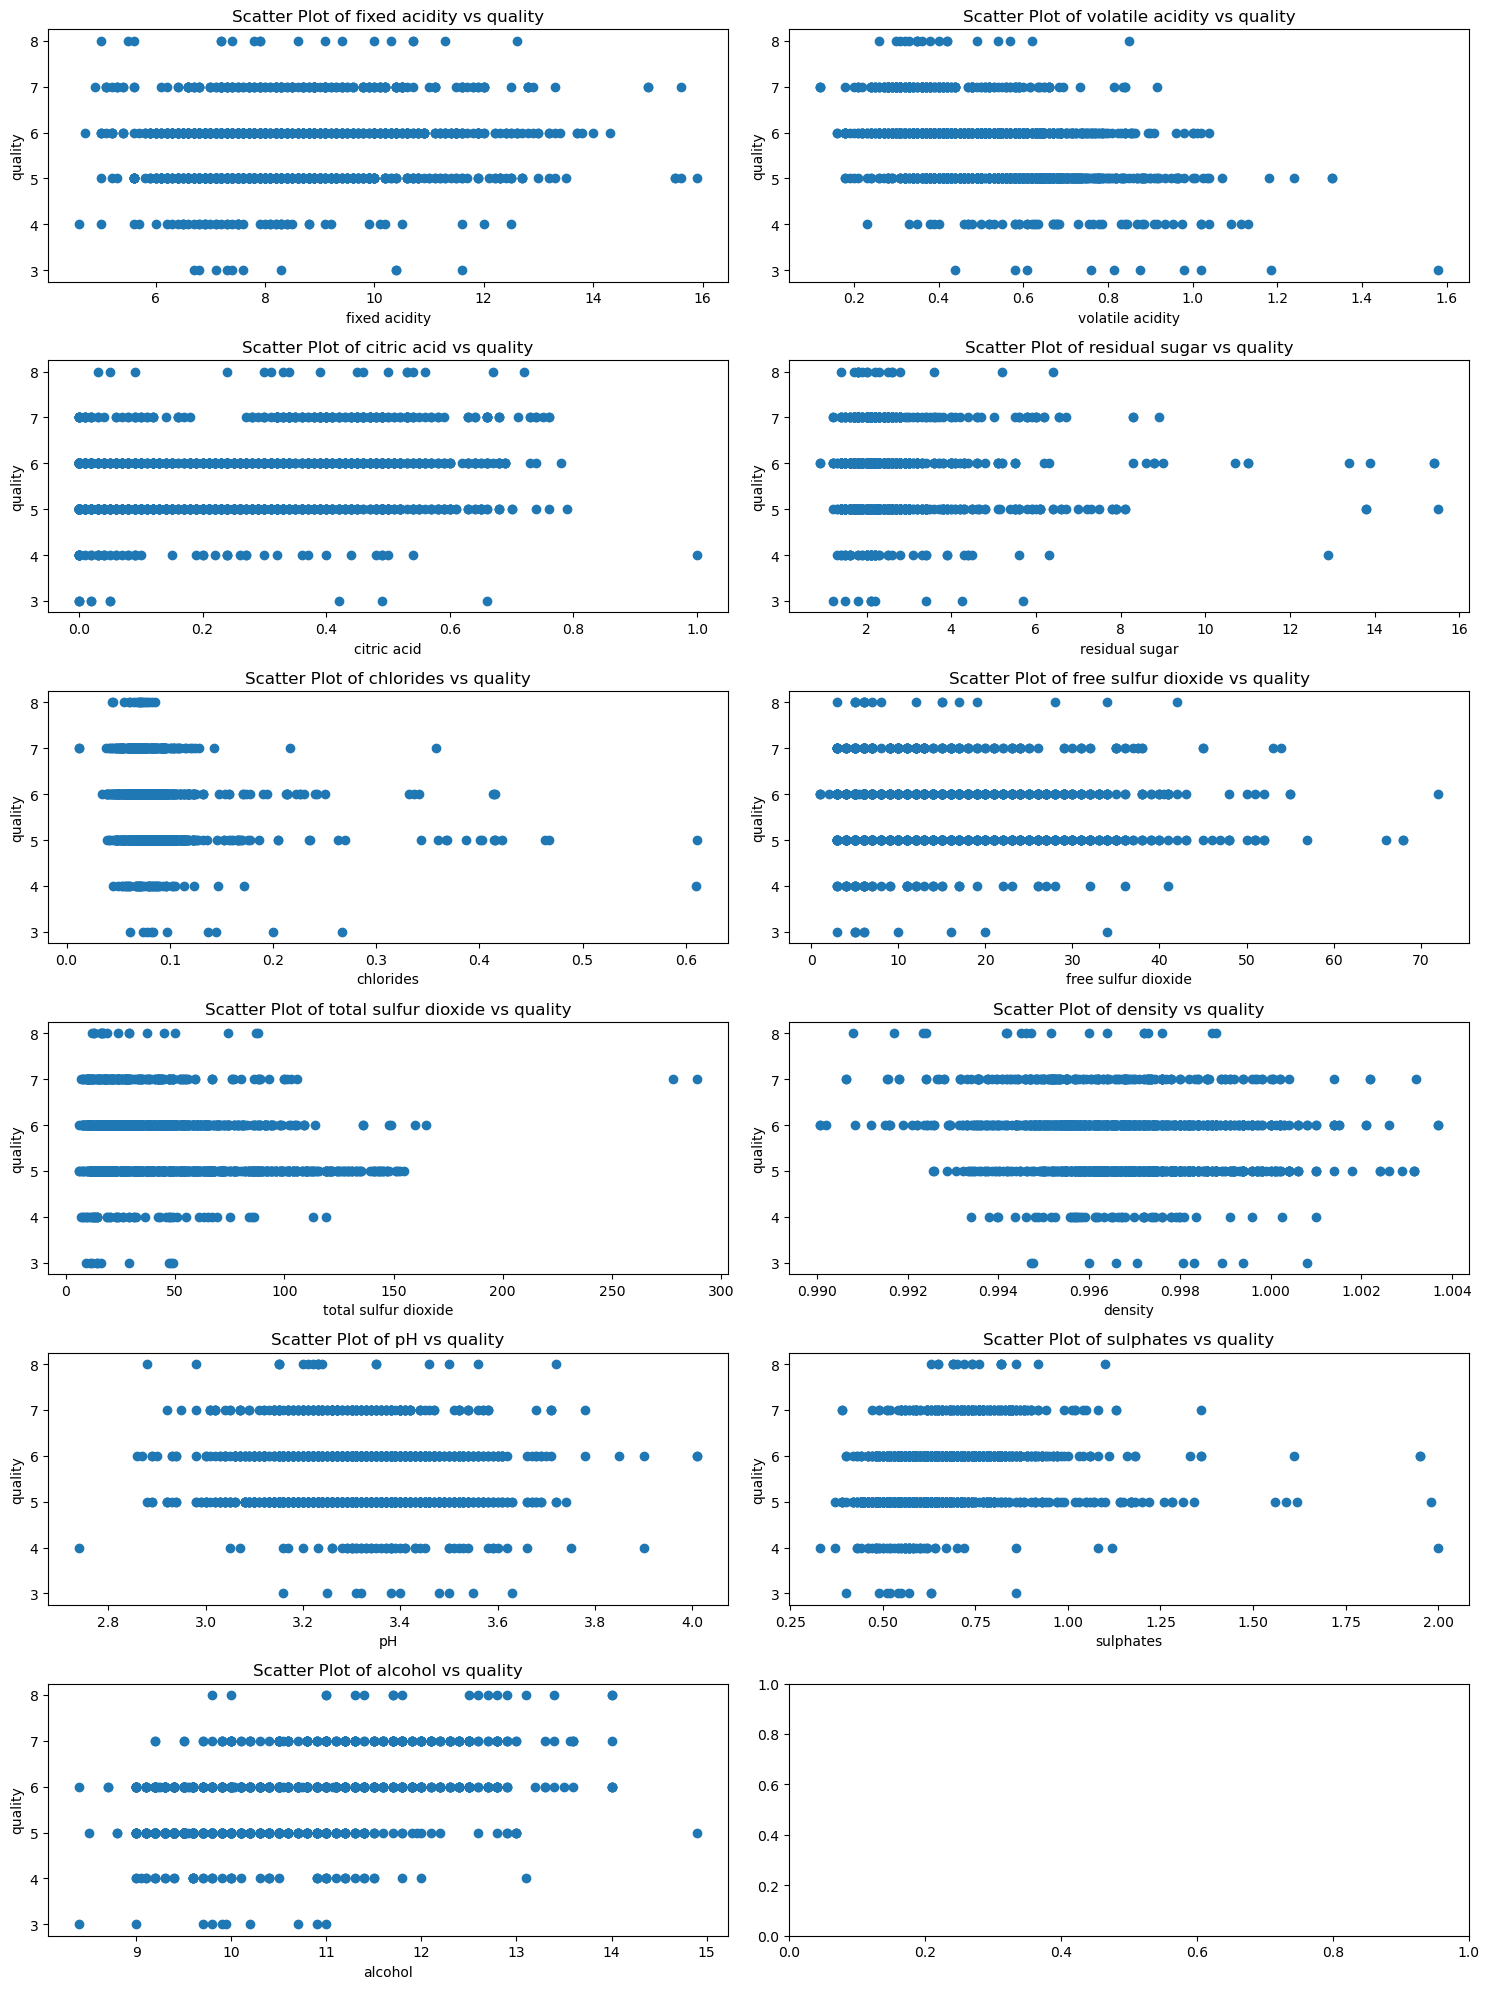

In [13]:
# 그리드 생성
num_cols = len(df.columns)
num_rows = math.ceil(num_cols / 2)  # 2열로 나누어 그리기

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 20))

# 각 열의 독립변수들의 분포를 서브플롯에 그리기
for i, column in enumerate(df.columns[:-1]):  # 마지막 열은 종속 변수이므로 제외
    row_index = i // 2
    col_index = i % 2
    axes[row_index, col_index].scatter(df[column], df[df.columns[-1]])  # 산점도 그리기
    axes[row_index, col_index].set_title(f'Scatter Plot of {column} vs {df.columns[-1]}')
    axes[row_index, col_index].set_xlabel(column)
    axes[row_index, col_index].set_ylabel(df.columns[-1])

# 남은 subplot 숨기기
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes.flatten()[i])

# 레이아웃 조정
plt.tight_layout()
plt.show()


### 종속변수의 범주별 독립변수들의 개수()-종속변수(Quality)의 막대그래프

종속변수의 각 범주에 해당하는 독립변수의 개수와 종속변수의 상관관계가 있을까하고 막대그래프를 그렸다. 큰 상관관계는 없는 것으로 보이는데, 이는 범주가 quality 5와 6일때 자체의 샘플수가 많은 것 때문에 x축 값이 높아보이는 확률이 높다고 생각한다. 정확한 분석을 위해서는 각 범주별 데이터의 개수를 동일하게 뽑아서 EDA 분석을 할 필요가 있어보인다. 즉, quality 3~8의 샘플수를 모두 동일하게 했을 때 막대그래프를 그려보거나 산점도를 그리면 유의미한 결과가 도출되지 않을까 생각한다. 

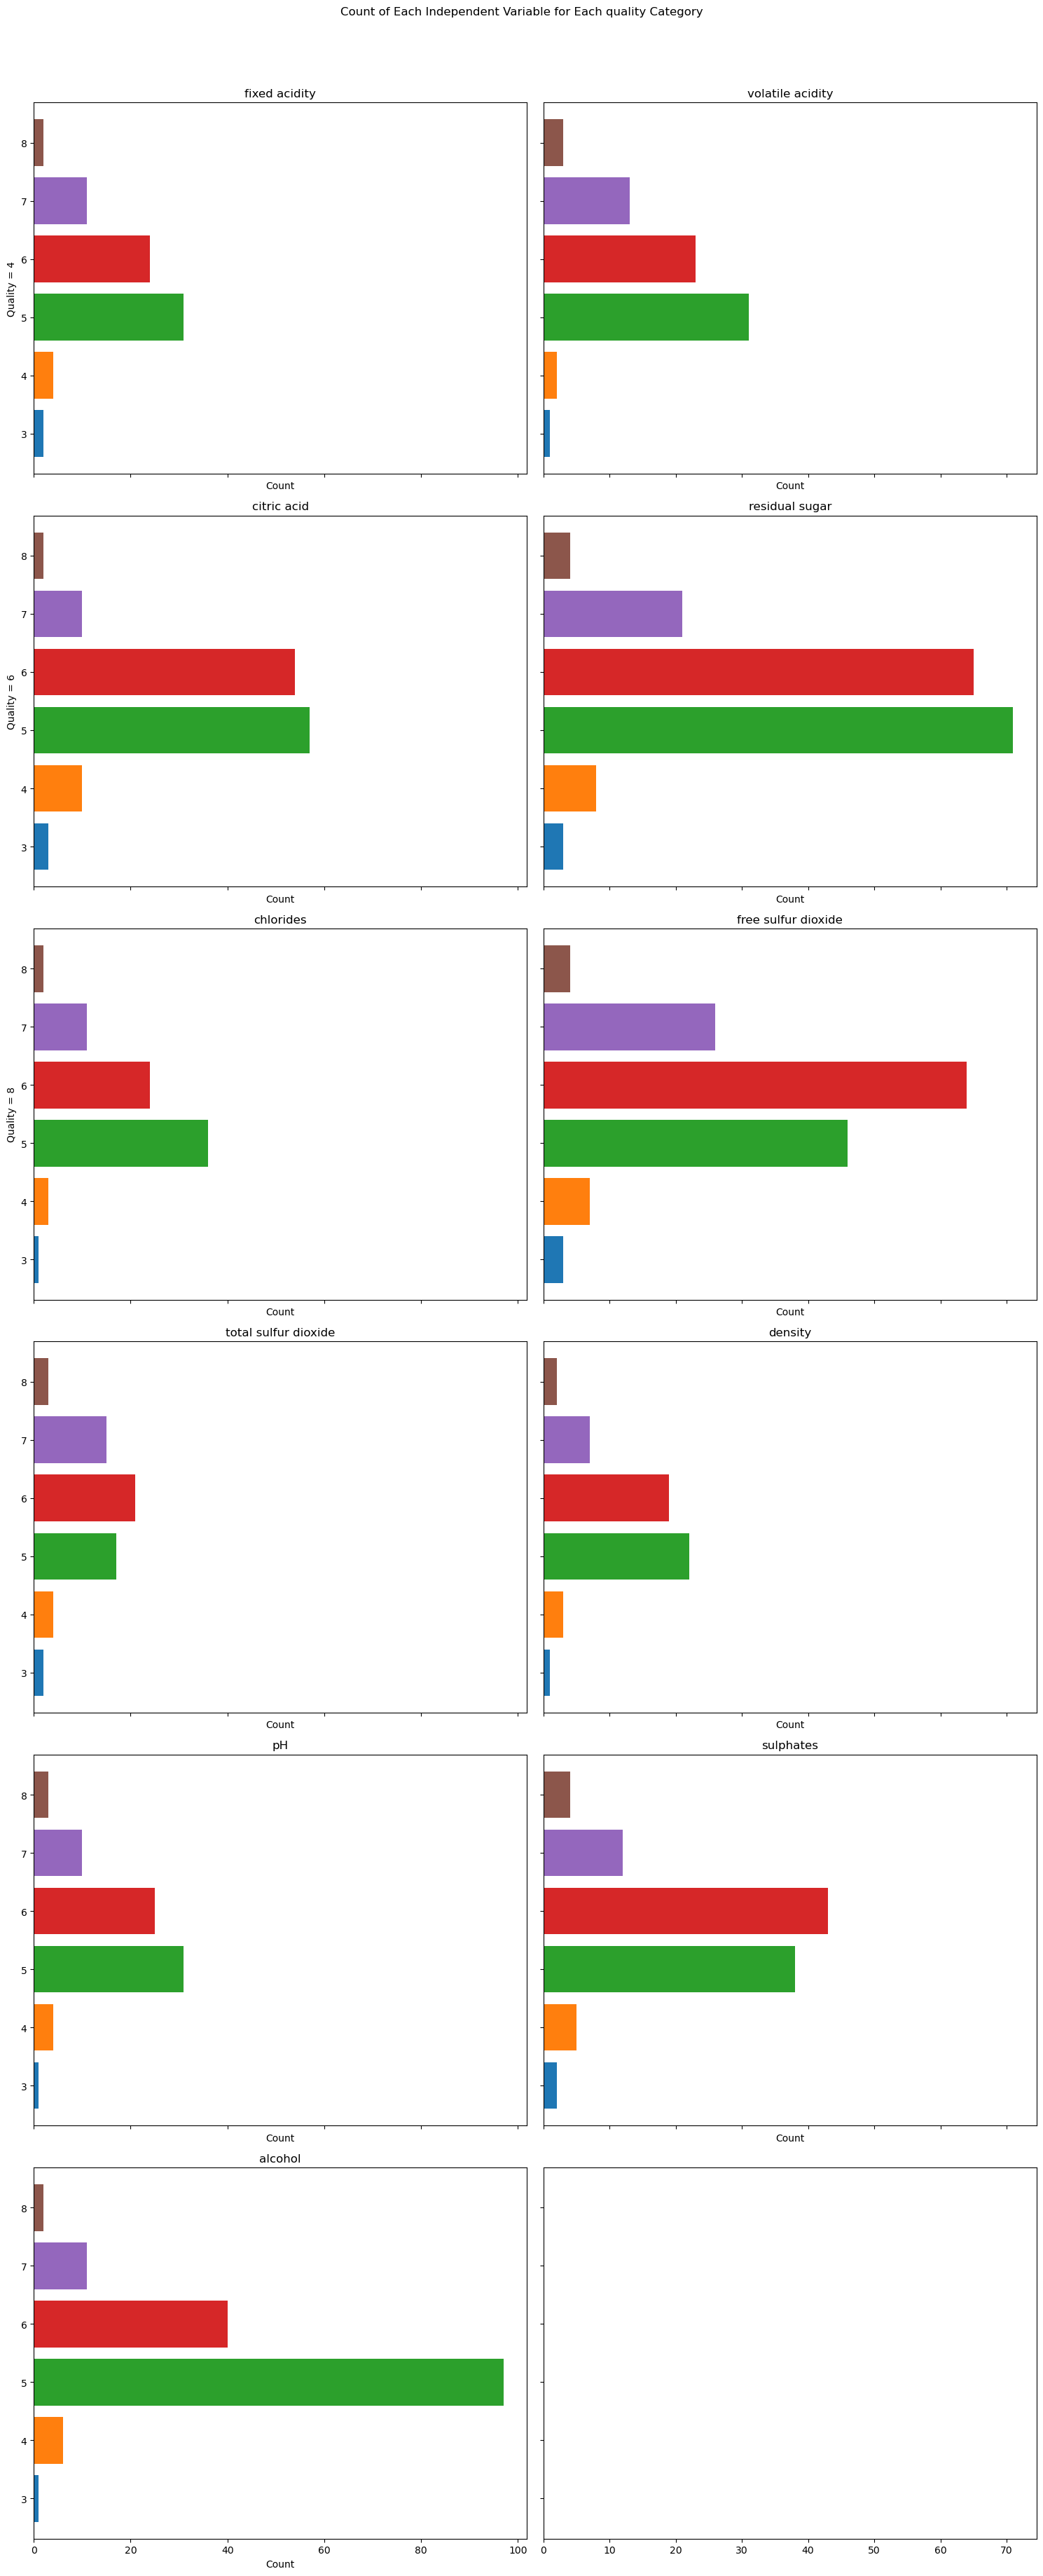

In [39]:
import matplotlib.pyplot as plt

# 종속변수 선택
dependent_variable = df.columns[-1]

# 독립변수 목록 선택 (마지막 열을 제외한 모든 열)
independent_variables = df.columns[:-1]

# 그리드 생성
num_cols = 2
num_rows = len(independent_variables) // num_cols + len(independent_variables) % num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows), sharex='col', sharey='row')

# 모든 독립변수에 대해 각 quality 범주에 대한 값의 개수 막대그래프 그리기
for i, independent_variable in enumerate(independent_variables):
    row_index = i // num_cols
    col_index = i % num_cols
    
    for j, category in enumerate(sorted(df[dependent_variable].unique())):
        x_values = df[df[dependent_variable] == category][independent_variable].value_counts().index
        y_values = df[df[dependent_variable] == category][independent_variable].value_counts().values
        bars = axes[row_index, col_index].barh([category] * len(x_values), y_values, label=f"{dependent_variable}={category} {independent_variable}")
        
        # 각 막대 위에 숫자 표시 (숫자가 5개 이상일 때는 표시하지 않음)
        if len(x_values) <= 5:
            for bar, value in zip(bars, y_values):
                axes[row_index, col_index].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, value,
                                                va='center', ha='left', color='black')

    # subplot에 x축 레이블 추가
    axes[row_index, col_index].set_xlabel("Count")

# 각 subplot에 제목 추가
for i, independent_variable in enumerate(independent_variables):
    row_index = i // num_cols
    col_index = i % num_cols
    axes[row_index, col_index].set_title(f"{independent_variable}")

# 각 subplot에 y축 레이블 추가
for i, dependent_variable_value in enumerate(sorted(df[dependent_variable].unique())):
    row_index = i // num_cols
    col_index = i % num_cols
    axes[row_index, 0].set_ylabel(f"Quality = {dependent_variable_value}")

fig.suptitle(f"Count of Each Independent Variable for Each {dependent_variable} Category", y=1.02)
fig.tight_layout()
plt.show()

### 독립변수() - 종속변수(Quality)의 Violin Plot

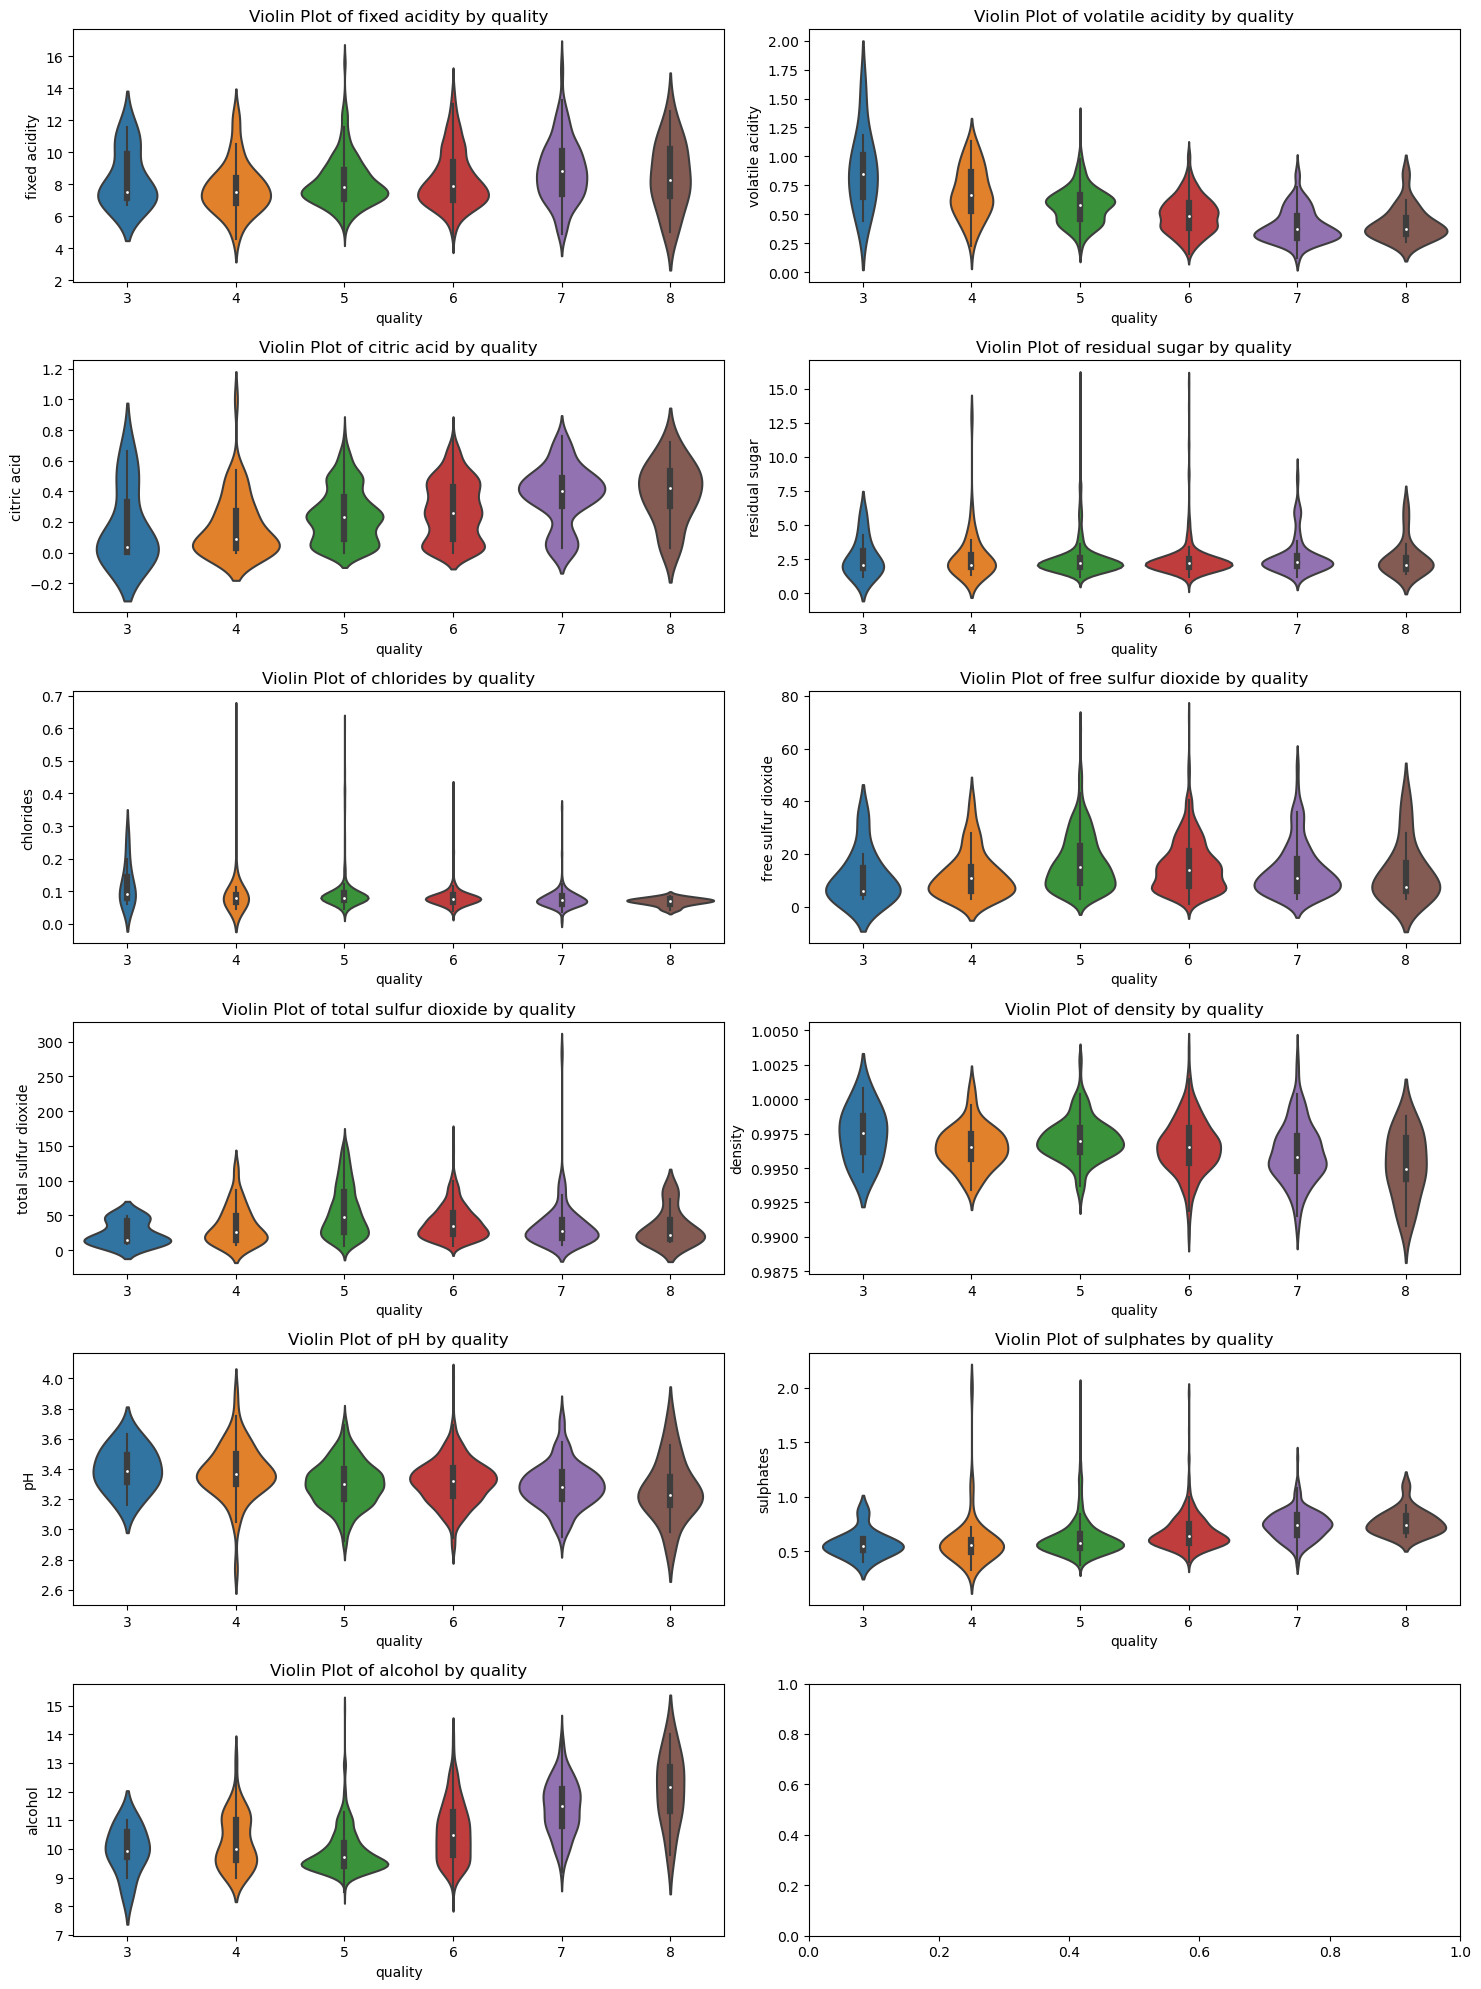

In [15]:
import seaborn as sns

# 그리드 생성
num_cols = len(df.columns)
num_rows = math.ceil(num_cols / 2)  # 2열로 나누어 그리기

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 20))

# 각 열의 독립변수들의 violin plot을 서브플롯에 그리기
for i, column in enumerate(df.columns[:-1]):  # 마지막 열은 종속 변수이므로 제외
    row_index = i // 2
    col_index = i % 2
    sns.violinplot(x=df[df.columns[-1]], y=df[column], ax=axes[row_index, col_index])  # violin plot 그리기
    axes[row_index, col_index].set_title(f'Violin Plot of {column} by {df.columns[-1]}')
    axes[row_index, col_index].set_xlabel(df.columns[-1])
    axes[row_index, col_index].set_ylabel(column)

# 남은 subplot 숨기기
for i in range(num_cols, num_rows * 2):
    fig.delaxes(axes.flatten()[i])

# 레이아웃 조정
plt.tight_layout()
plt.show()

### 히트맵

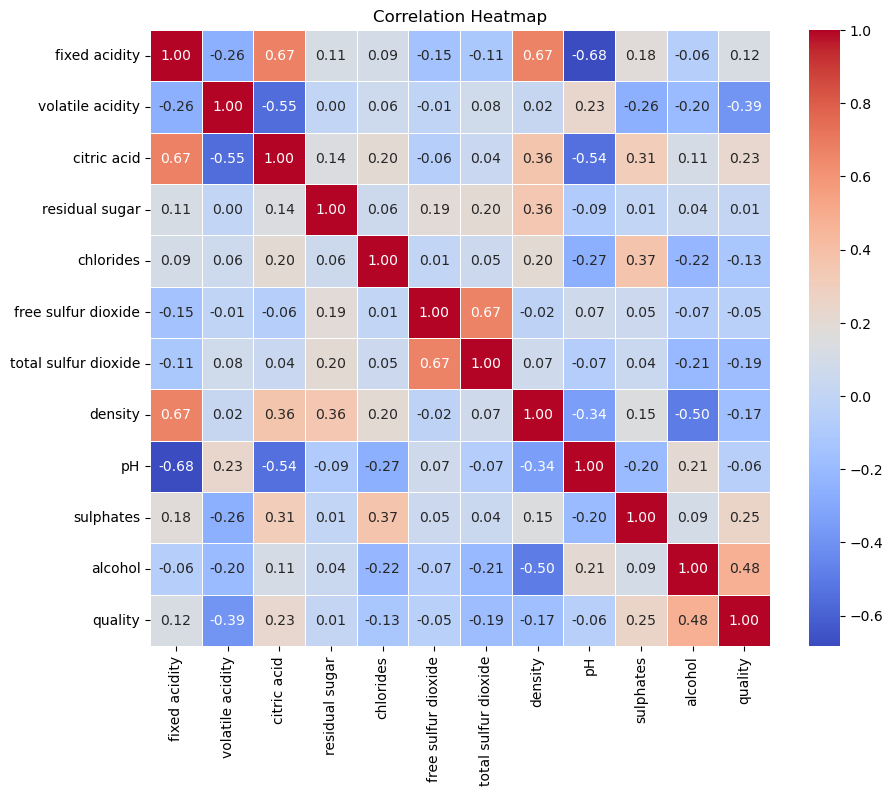

In [21]:
# 상관관계 행렬 계산
correlation_matrix = df.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 중복되는 데이터 제거하는 작업

In [23]:
df.duplicated() 
datachange = df.drop_duplicates()
datachange

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
